In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
%matplotlib inline

## Dataset Overview

Name: Bank Customer Churn Dataset

Content: The dataset comprises detailed records of bank customers, focusing on
various attributes that might influence their decision to leave (or churn) the bank.

URL: https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction

## Composition of the Dataset

1. Customer Demographics:

• Age: The age of the customers.

• Gender: Male or Female, offering insights into gender-based trends in
banking behavior.

• Geography: Customer’s location, which could influence their banking
needs and preferences.

2. Banking Relationship:

• Tenure: Duration of the customer’s relationship with the bank, an essential
factor in loyalty and churn.

• Balance: The amount of money held in the customer’s bank accounts.

• Products Number: The number of banking products used by the customer,
such as savings accounts, credit cards, or loans.

3. Financial Behavior:

• Credit Score: Provides insight into the customer’s financial reliability.

• Estimated Salary: The customer’s salary, which can impact their banking
needs and potential for investments.

4. Customer Status:

• IsActiveMember: Indicates whether the customer is actively using the
bank’s services.

• Exited: The primary response variable, indicating whether the customer
has churned or not.

## Data Loading and Preprocessing

In [3]:
churn_data = pd.read_csv('Churn_Modelling.csv')

In [4]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
churn_data.shape

(10000, 14)

In [7]:
missing_values = churn_data.isnull().sum()
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
number_of_duplicate_rows = churn_data.duplicated().sum()
number_of_duplicate_rows

np.int64(0)

In [10]:
renamed_columns = {'HasCrCard': 'HasCreditCard'}
churn_data.rename(columns=renamed_columns, inplace=True)

In [11]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis (EDA)

### Descriptive Statistics Analysis

In [12]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


## Univariate Analysis

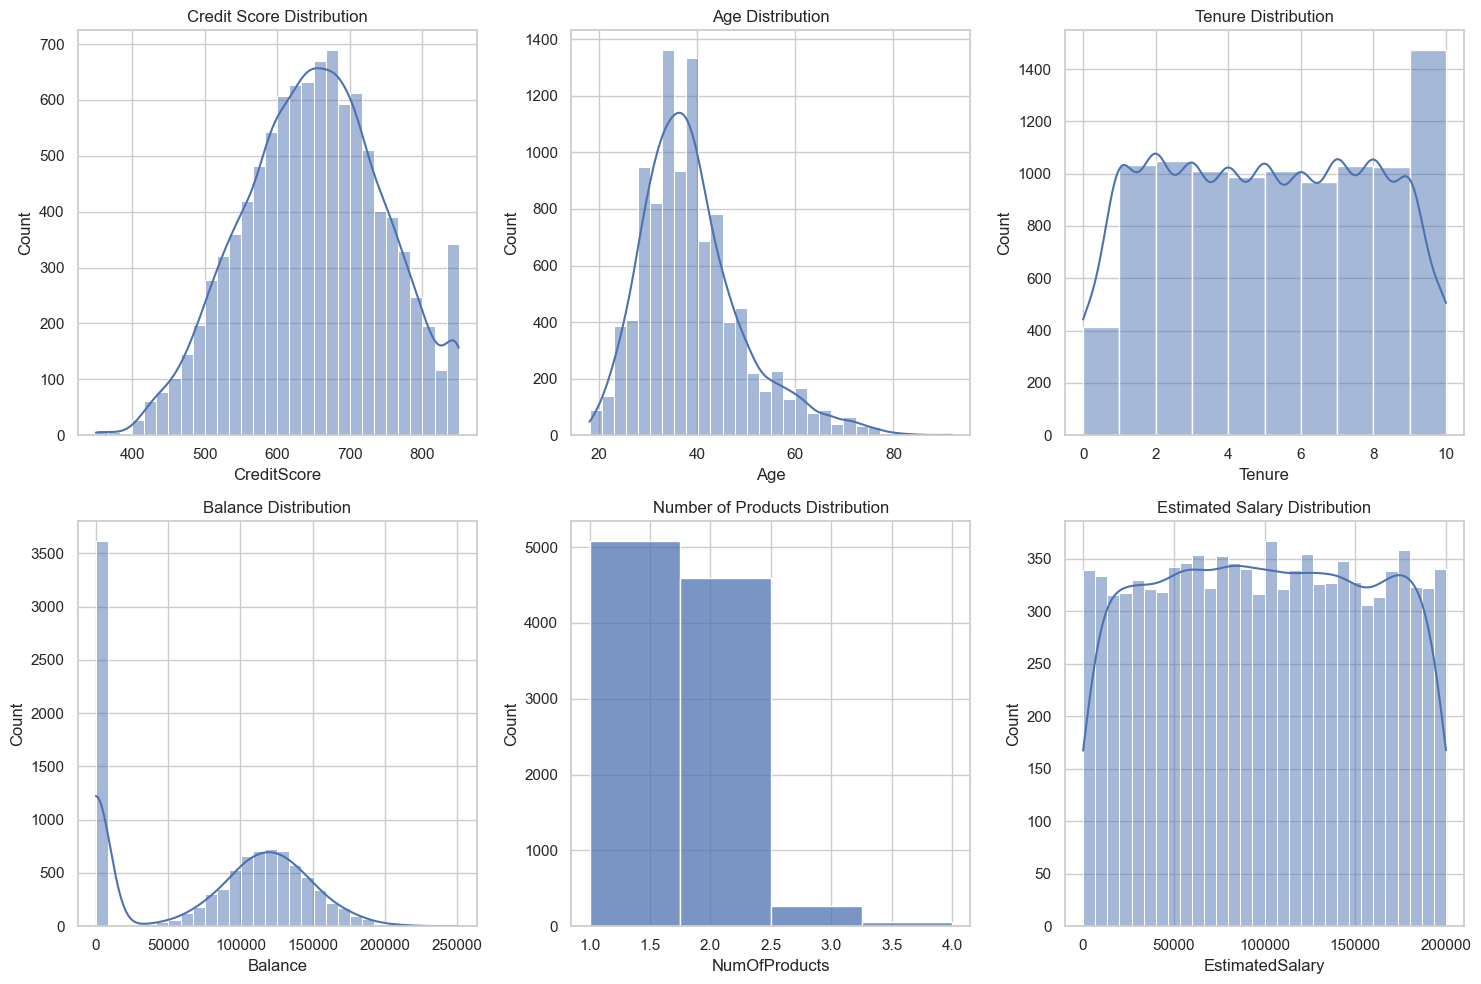

In [13]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Credit Score Distribution
sns.histplot(churn_data['CreditScore'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Credit Score Distribution')

# Age Distribution
sns.histplot(churn_data['Age'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Age Distribution')

# Tenure Distribution
sns.histplot(churn_data['Tenure'], bins=10, ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Tenure Distribution')

# Balance Distribution
sns.histplot(churn_data['Balance'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Balance Distribution')

# Number of Products Distribution
sns.histplot(churn_data['NumOfProducts'], bins=4, ax=axes[1, 1])
axes[1, 1].set_title('Number of Products Distribution')

# Estimated Salary Distribution
sns.histplot(churn_data['EstimatedSalary'], bins=30, ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Estimated Salary Distribution')

plt.tight_layout()
plt.show()

## Churn Analysis

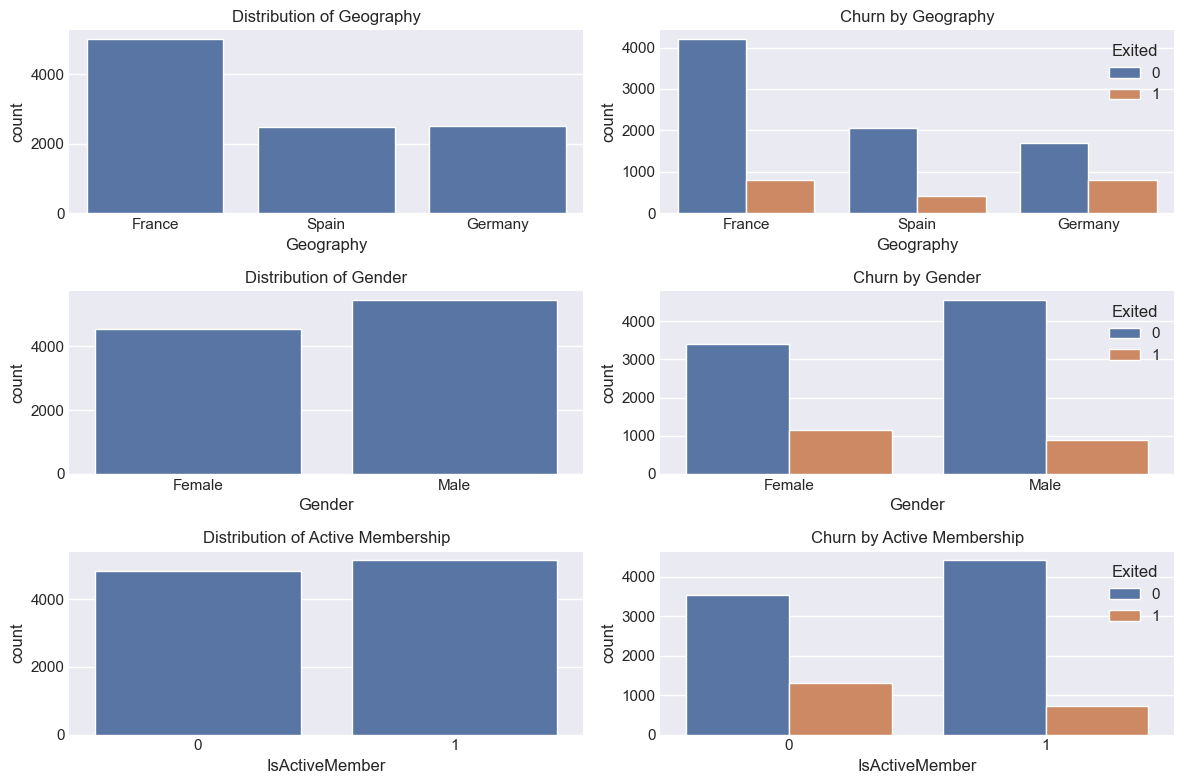

In [16]:
plt.style.use('seaborn-v0_8-darkgrid')

fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Geography
sns.countplot(ax=axes[0, 0], x='Geography', data=churn_data)
axes[0, 0].set_title('Distribution of Geography')

sns.countplot(ax=axes[0, 1], x='Geography', hue='Exited', data=churn_data)
axes[0, 1].set_title('Churn by Geography')

# Gender
sns.countplot(ax=axes[1, 0], x='Gender', data=churn_data)
axes[1, 0].set_title('Distribution of Gender')

sns.countplot(ax=axes[1, 1], x='Gender', hue='Exited', data=churn_data)
axes[1, 1].set_title('Churn by Gender')

# IsActiveMember
sns.countplot(ax=axes[2, 0], x='IsActiveMember', data=churn_data)
axes[2, 0].set_title('Distribution of Active Membership')

sns.countplot(ax=axes[2, 1], x='IsActiveMember', hue='Exited', data=churn_data)
axes[2, 1].set_title('Churn by Active Membership')

plt.tight_layout()
plt.show()

In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

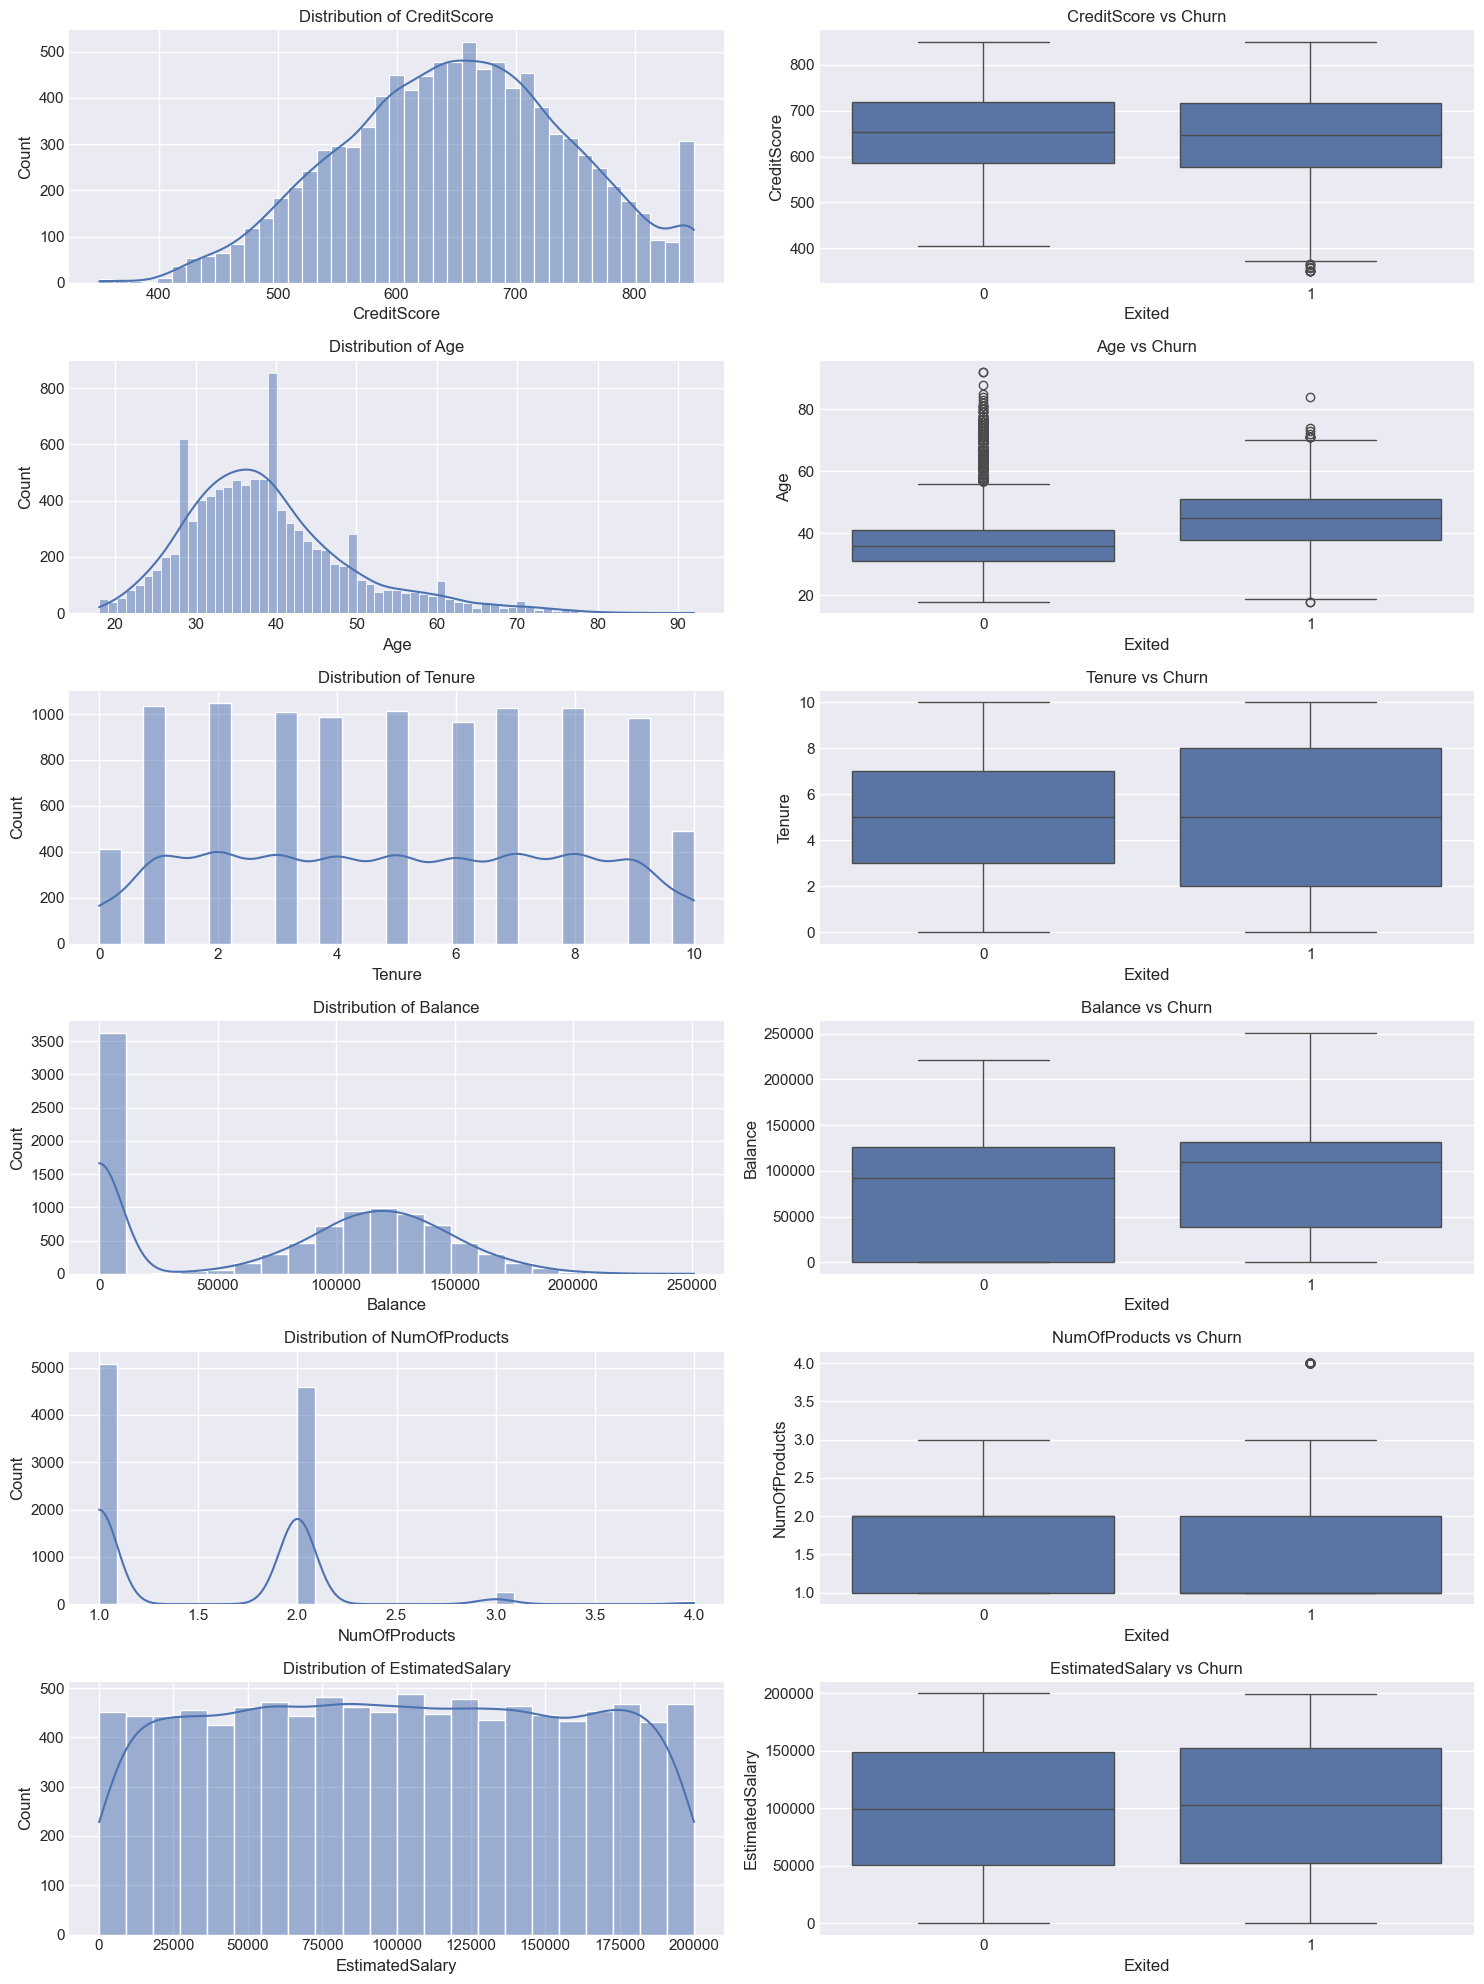

In [20]:
# Selecting numerical columns for analysis
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 20))

for i, col in enumerate(numerical_columns):
    # Histogram for distribution
    sns.histplot(churn_data[col], kde=True, ax=axes[i][0])
    axes[i][0].set_title(f'Distribution of {col}')

    # Boxplot to see relationship with churn
    sns.boxplot(x='Exited', y=col, data=churn_data, ax=axes[i][1])
    axes[i][1].set_title(f'{col} vs Churn')

plt.tight_layout()
plt.show()

## Customer Segmentation

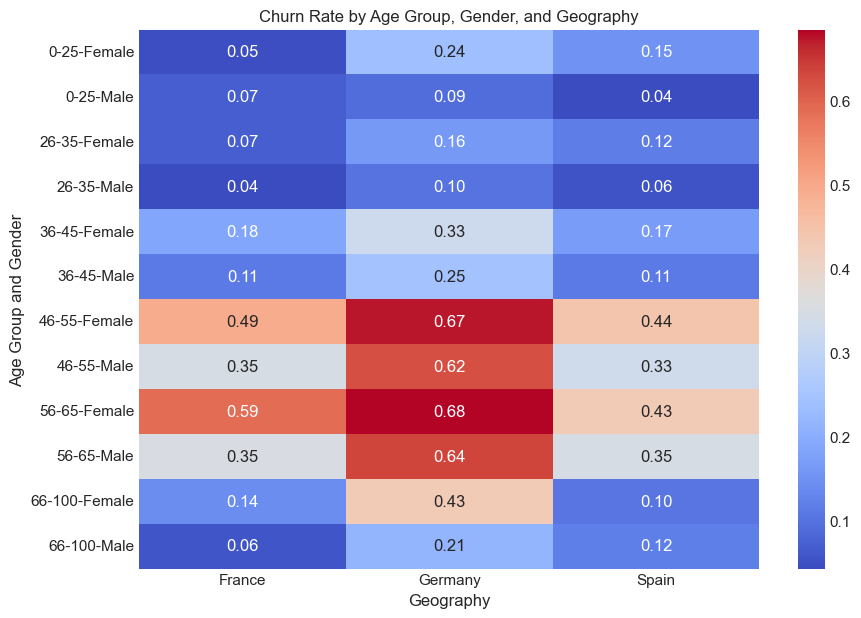

In [22]:
# Age Segmentation
# Creating age groups for segmentation
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '66-100']
churn_data['AgeGroup'] = pd.cut(churn_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Analyzing the Churn Rate within each demographic segment
# Pivot table to analyze churn rate by Age Group, Gender, and Geography
pivot_table = churn_data.pivot_table(values='Exited', index=['AgeGroup', 'Gender'], 
                                     columns='Geography', aggfunc='mean', observed=False)

# Visualizing the Churn Rate within each demographic segment
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Churn Rate by Age Group, Gender, and Geography')
plt.xlabel('Geography')
plt.ylabel('Age Group and Gender')
plt.show()

In [23]:
type(pivot_table)

pandas.core.frame.DataFrame

In [24]:
pivot_table.head()

Geography        France  Germany  Spain
AgeGroup Gender                        
0-25     Female    0.05     0.24   0.15
         Male      0.07     0.09   0.04
26-35    Female    0.07     0.16   0.12
         Male      0.04     0.10   0.06
36-45    Female    0.18     0.33   0.17

## Value-based Segmentation

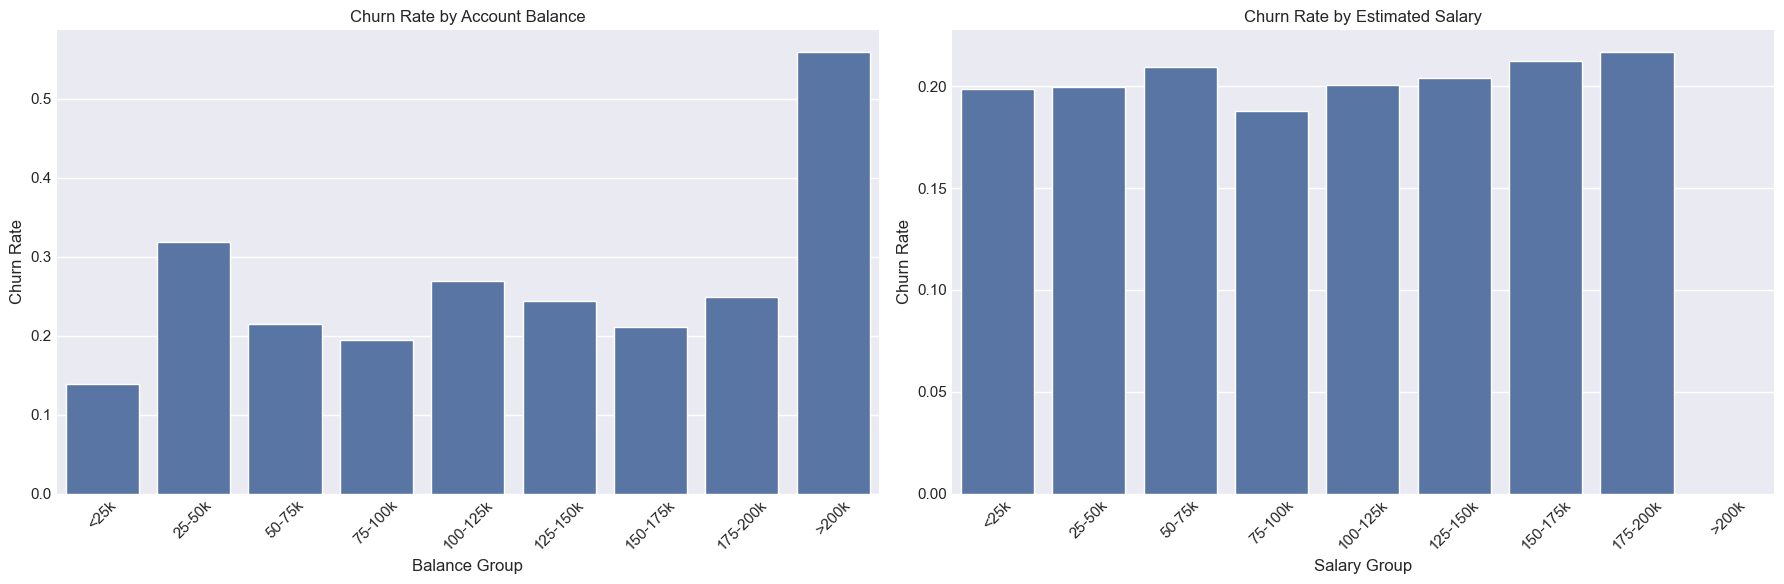

In [26]:
# Value-Based Segmentation based on Account Balance and Estimated Salary

# Creating balance segments
balance_bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, float('inf')]
balance_labels = ['<25k', '25-50k', '50-75k', '75-100k', '100-125k', '125-150k', '150-175k', '175-200k', '>200k']
churn_data['BalanceGroup'] = pd.cut(churn_data['Balance'], bins=balance_bins, labels=balance_labels, right=False)

# Creating salary segments
salary_bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, float('inf')]
salary_labels = ['<25k', '25-50k', '50-75k', '75-100k', '100-125k', '125-150k', '150-175k', '175-200k', '>200k']
churn_data['SalaryGroup'] = pd.cut(churn_data['EstimatedSalary'], bins=salary_bins, labels=salary_labels, right=False)

# Analyzing churn rates in balance segments
balance_churn = churn_data.groupby('BalanceGroup', observed=True)['Exited'].mean().reset_index()

# Analyzing churn rates in salary segments
salary_churn = churn_data.groupby('SalaryGroup', observed=True)['Exited'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Balance Segments
sns.barplot(x='BalanceGroup', y='Exited', data=balance_churn, ax=axes[0])
axes[0].set_title('Churn Rate by Account Balance')
axes[0].set_xlabel('Balance Group')
axes[0].set_ylabel('Churn Rate')
axes[0].tick_params(axis='x', rotation=45)

# Salary Segments
sns.barplot(x='SalaryGroup', y='Exited', data=salary_churn, ax=axes[1])
axes[1].set_title('Churn Rate by Estimated Salary')
axes[1].set_xlabel('Salary Group')
axes[1].set_ylabel('Churn Rate')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()